<a href="https://colab.research.google.com/github/Patil-Ojas/Face-Mask-Detection/blob/main/ai_face_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import tensorflow
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from imutils import paths

from keras.applications import MobileNetV2
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import to_categorical

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
dataset = "/content/drive/MyDrive/facemask_data/Facemask_Detection-master/Facemask_Detection-master/dataset"

In [ ]:
imagePaths = list(paths.list_images(dataset))

In [ ]:
imagePaths

['/content/drive/MyDrive/facemask_data/Facemask_Detection-master/Facemask_Detection-master/dataset/with_mask/with_mask_1339.jpg',
 '/content/drive/MyDrive/facemask_data/Facemask_Detection-master/Facemask_Detection-master/dataset/with_mask/with_mask_174.jpg',
 '/content/drive/MyDrive/facemask_data/Facemask_Detection-master/Facemask_Detection-master/dataset/with_mask/with_mask_1882.jpg',
 '/content/drive/MyDrive/facemask_data/Facemask_Detection-master/Facemask_Detection-master/dataset/with_mask/with_mask_424.jpg',
 '/content/drive/MyDrive/facemask_data/Facemask_Detection-master/Facemask_Detection-master/dataset/with_mask/with_mask_872.jpg',
 '/content/drive/MyDrive/facemask_data/Facemask_Detection-master/Facemask_Detection-master/dataset/with_mask/with_mask_2700.jpg',
 '/content/drive/MyDrive/facemask_data/Facemask_Detection-master/Facemask_Detection-master/dataset/with_mask/with_mask_1540.jpg',
 '/content/drive/MyDrive/facemask_data/Facemask_Detection-master/Facemask_Detection-master/da

In [ ]:
data = []
labels = []

for i in imagePaths:
  label =  i.split(os.path.sep)[-2]
  labels.append(label)
  image = load_img(i, target_size=(96, 96))
  image = img_to_array(image)
  image = preprocess_input(image)
  data.append(image)


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
data = np.array(data, dtype='float32')
labels = np.array(labels)

In [ ]:
labels

array(['with_mask', 'with_mask', 'with_mask', ..., 'without_mask',
       'without_mask', 'without_mask'], dtype='<U12')

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [ ]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
# splitting of data
train_X,text_X,train_Y,test_Y, = train_test_split(data, labels, test_size=0.15, random_state=10, stratify=labels)

In [ ]:
train_X

array([[[[-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         ...,
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ]],

        [[-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         ...,
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ]],

        [[-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         ...,
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ]],

        ...,

        [[-1.        , -1.        , -0

In [ ]:
train_Y.size

6800

In [ ]:
test_Y.size

1200

In [ ]:
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,width_shift_range=0.2,
    height_shift_range=0.2,shear_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

In [ ]:
input_shape = (96,96,3)

In [ ]:
# building the model
input_image = Input(shape=input_shape)

# 1st conv layer
model = Conv2D(16, (3,3), activation='relu', padding='same', input_shape=input_shape)(input_image)
model = MaxPooling2D((2, 2), padding='same')(model)

# 2nd
model = Conv2D(32, (3,3), activation='relu', padding='same')(model)
model = MaxPooling2D((2, 2), padding='same')(model)

# 3rd
model = Conv2D(64, (3,3), activation='relu', padding='same')(model)
model = MaxPooling2D((2, 2), padding='same')(model)

# 4th
model = Conv2D(128, (3,3), activation='relu', padding='same')(model)
model = MaxPooling2D((2, 2), padding='same')(model)

# 5th
model = Conv2D(256, (3,3), activation='relu', padding='same')(model)
model = MaxPooling2D((2, 2), padding='same')(model)

model = Flatten()(model)
model = Dense(1024)(model)
model = Dense(64)(model)

output = Dense(2, activation='softmax')(model)
model = Model(inputs=[input_image], outputs=[output])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496 

In [ ]:
lr = 0.0005
Epochs = 100
BS = 32

opt = Adam(learning_rate=lr, decay=lr/Epochs)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
history = model.fit(
    aug.flow(train_X,train_Y,batch_size=BS),
    steps_per_epoch=len(train_X)//BS,
    validation_data = (text_X, test_Y),
    validation_steps = len(text_X)//BS,
    epochs = Epochs
)

Epoch 1/100
106/106 [==============================] - 18s 79ms/step - loss: 0.4984 - accuracy: 0.7521 - val_loss: 0.4075 - val_accuracy: 0.7950
Epoch 2/100
106/106 [==============================] - 8s 79ms/step - loss: 0.3476 - accuracy: 0.8563 - val_loss: 0.2662 - val_accuracy: 0.8883
Epoch 3/100
106/106 [==============================] - 9s 86ms/step - loss: 0.2893 - accuracy: 0.8857 - val_loss: 0.2652 - val_accuracy: 0.8967
Epoch 4/100
106/106 [==============================] - 9s 86ms/step - loss: 0.2694 - accuracy: 0.8973 - val_loss: 0.1947 - val_accuracy: 0.9217
Epoch 5/100
106/106 [==============================] - 8s 73ms/step - loss: 0.2370 - accuracy: 0.9071 - val_loss: 0.2495 - val_accuracy: 0.9133
Epoch 6/100
106/106 [==============================] - 8s 74ms/step - loss: 0.2298 - accuracy: 0.9097 - val_loss: 0.1965 - val_accuracy: 0.9300
Epoch 7/100
106/106 [==============================] - 9s 86ms/step - loss: 0.2013 - accuracy: 0.9222 - val_loss: 0.1642 - val_accuracy

<function matplotlib.pyplot.show(close=None, block=None)>

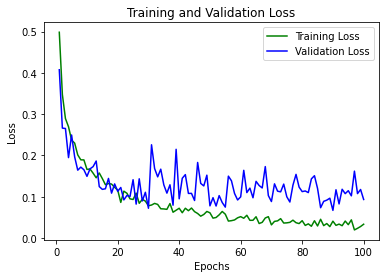

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, 101)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

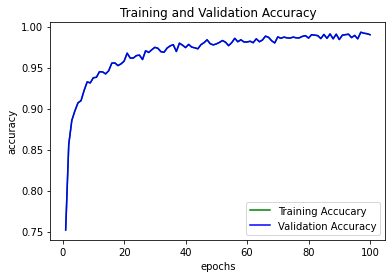

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1, 101)
plt.plot(epochs, acc_train, 'g', label = 'Training Accucary')
plt.plot(epochs, acc_train, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

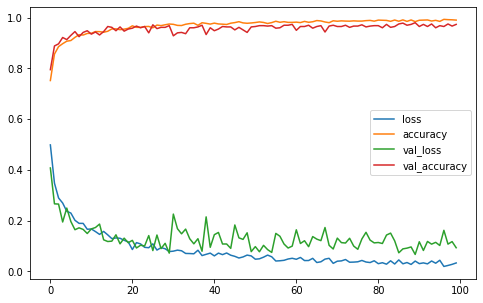

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
model.save('ai_collab_4000_32_100.h5')

In [ ]:
predict=model.predict(text_X,batch_size=BS)
predict=np.argmax(predict,axis=1)
print(classification_report(test_Y.argmax(axis=1),predict,target_names=lb.classes_))

19/19 [==============================] - 0s 12ms/step
              precision    recall  f1-score   support

   with_mask       0.96      0.99      0.97       300
without_mask       0.99      0.96      0.97       300

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600

